In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import ydata_profiling
import calendar

sales = pd.read_csv(r"C:\Users\DWIGHT JIRO\Downloads\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### EDA Supermarket Sales

In [68]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Day'] = (sales['Date']).dt.day
sales['Month'] = (sales['Date']).dt.month
sales['Month'] = sales['Month'].apply(lambda x: calendar.month_name[x])
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour

C:\Users\DWIGHT JIRO\AppData\Local\Temp\ipykernel_15800\2105283735.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [69]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2025-02-02 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,15.256000,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2025-02-02 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2025-02-02 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2025-02-02 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2025-02-02 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2025-02-02 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,31.000000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,8.693563,3.186857


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.030588
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,0.020668
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,NaN,-0.002770,-0.030588,0.020668,1.000000


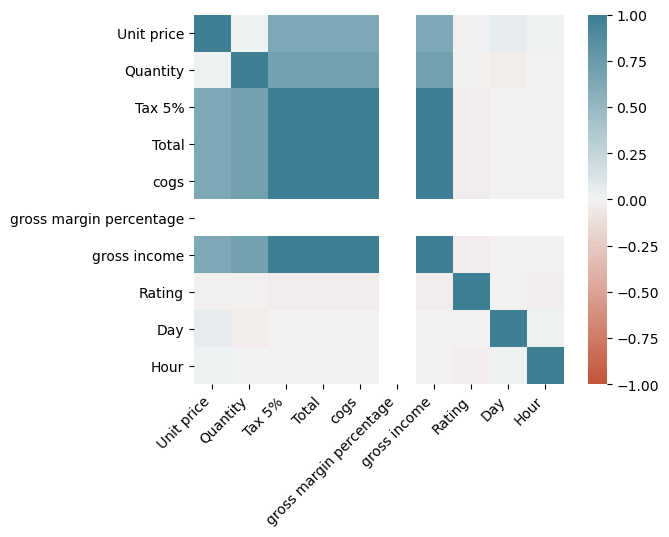

In [73]:
numeric_data = sales.select_dtypes(include=['number', 'float64', 'int64'])

data_corr = numeric_data.corr()

ax = sns.heatmap(
    data_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

data_corr

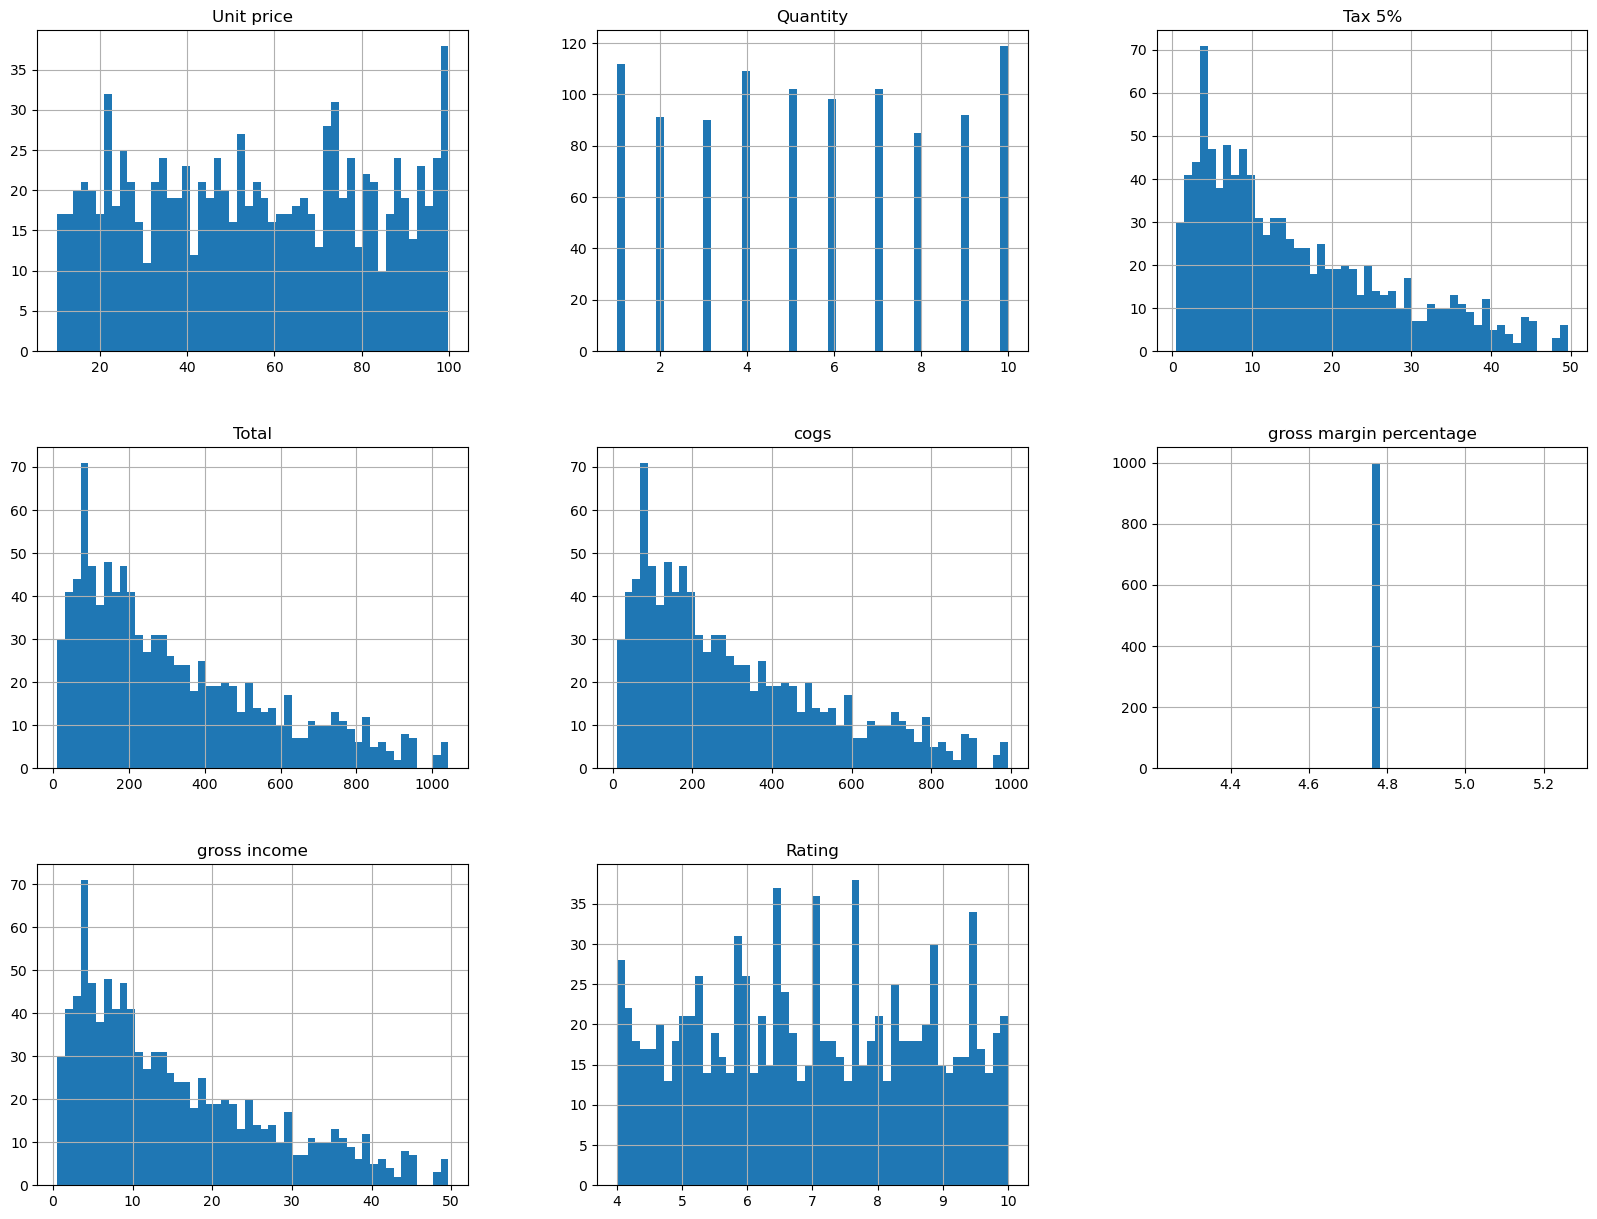

In [76]:
attributes = ["Unit price","Quantity","Tax 5%","Total","cogs","gross margin percentage","gross income","Rating"]
%matplotlib inline
import matplotlib.pyplot as plt
sales[attributes].hist(bins=50, figsize=(20,15))
plt.show()


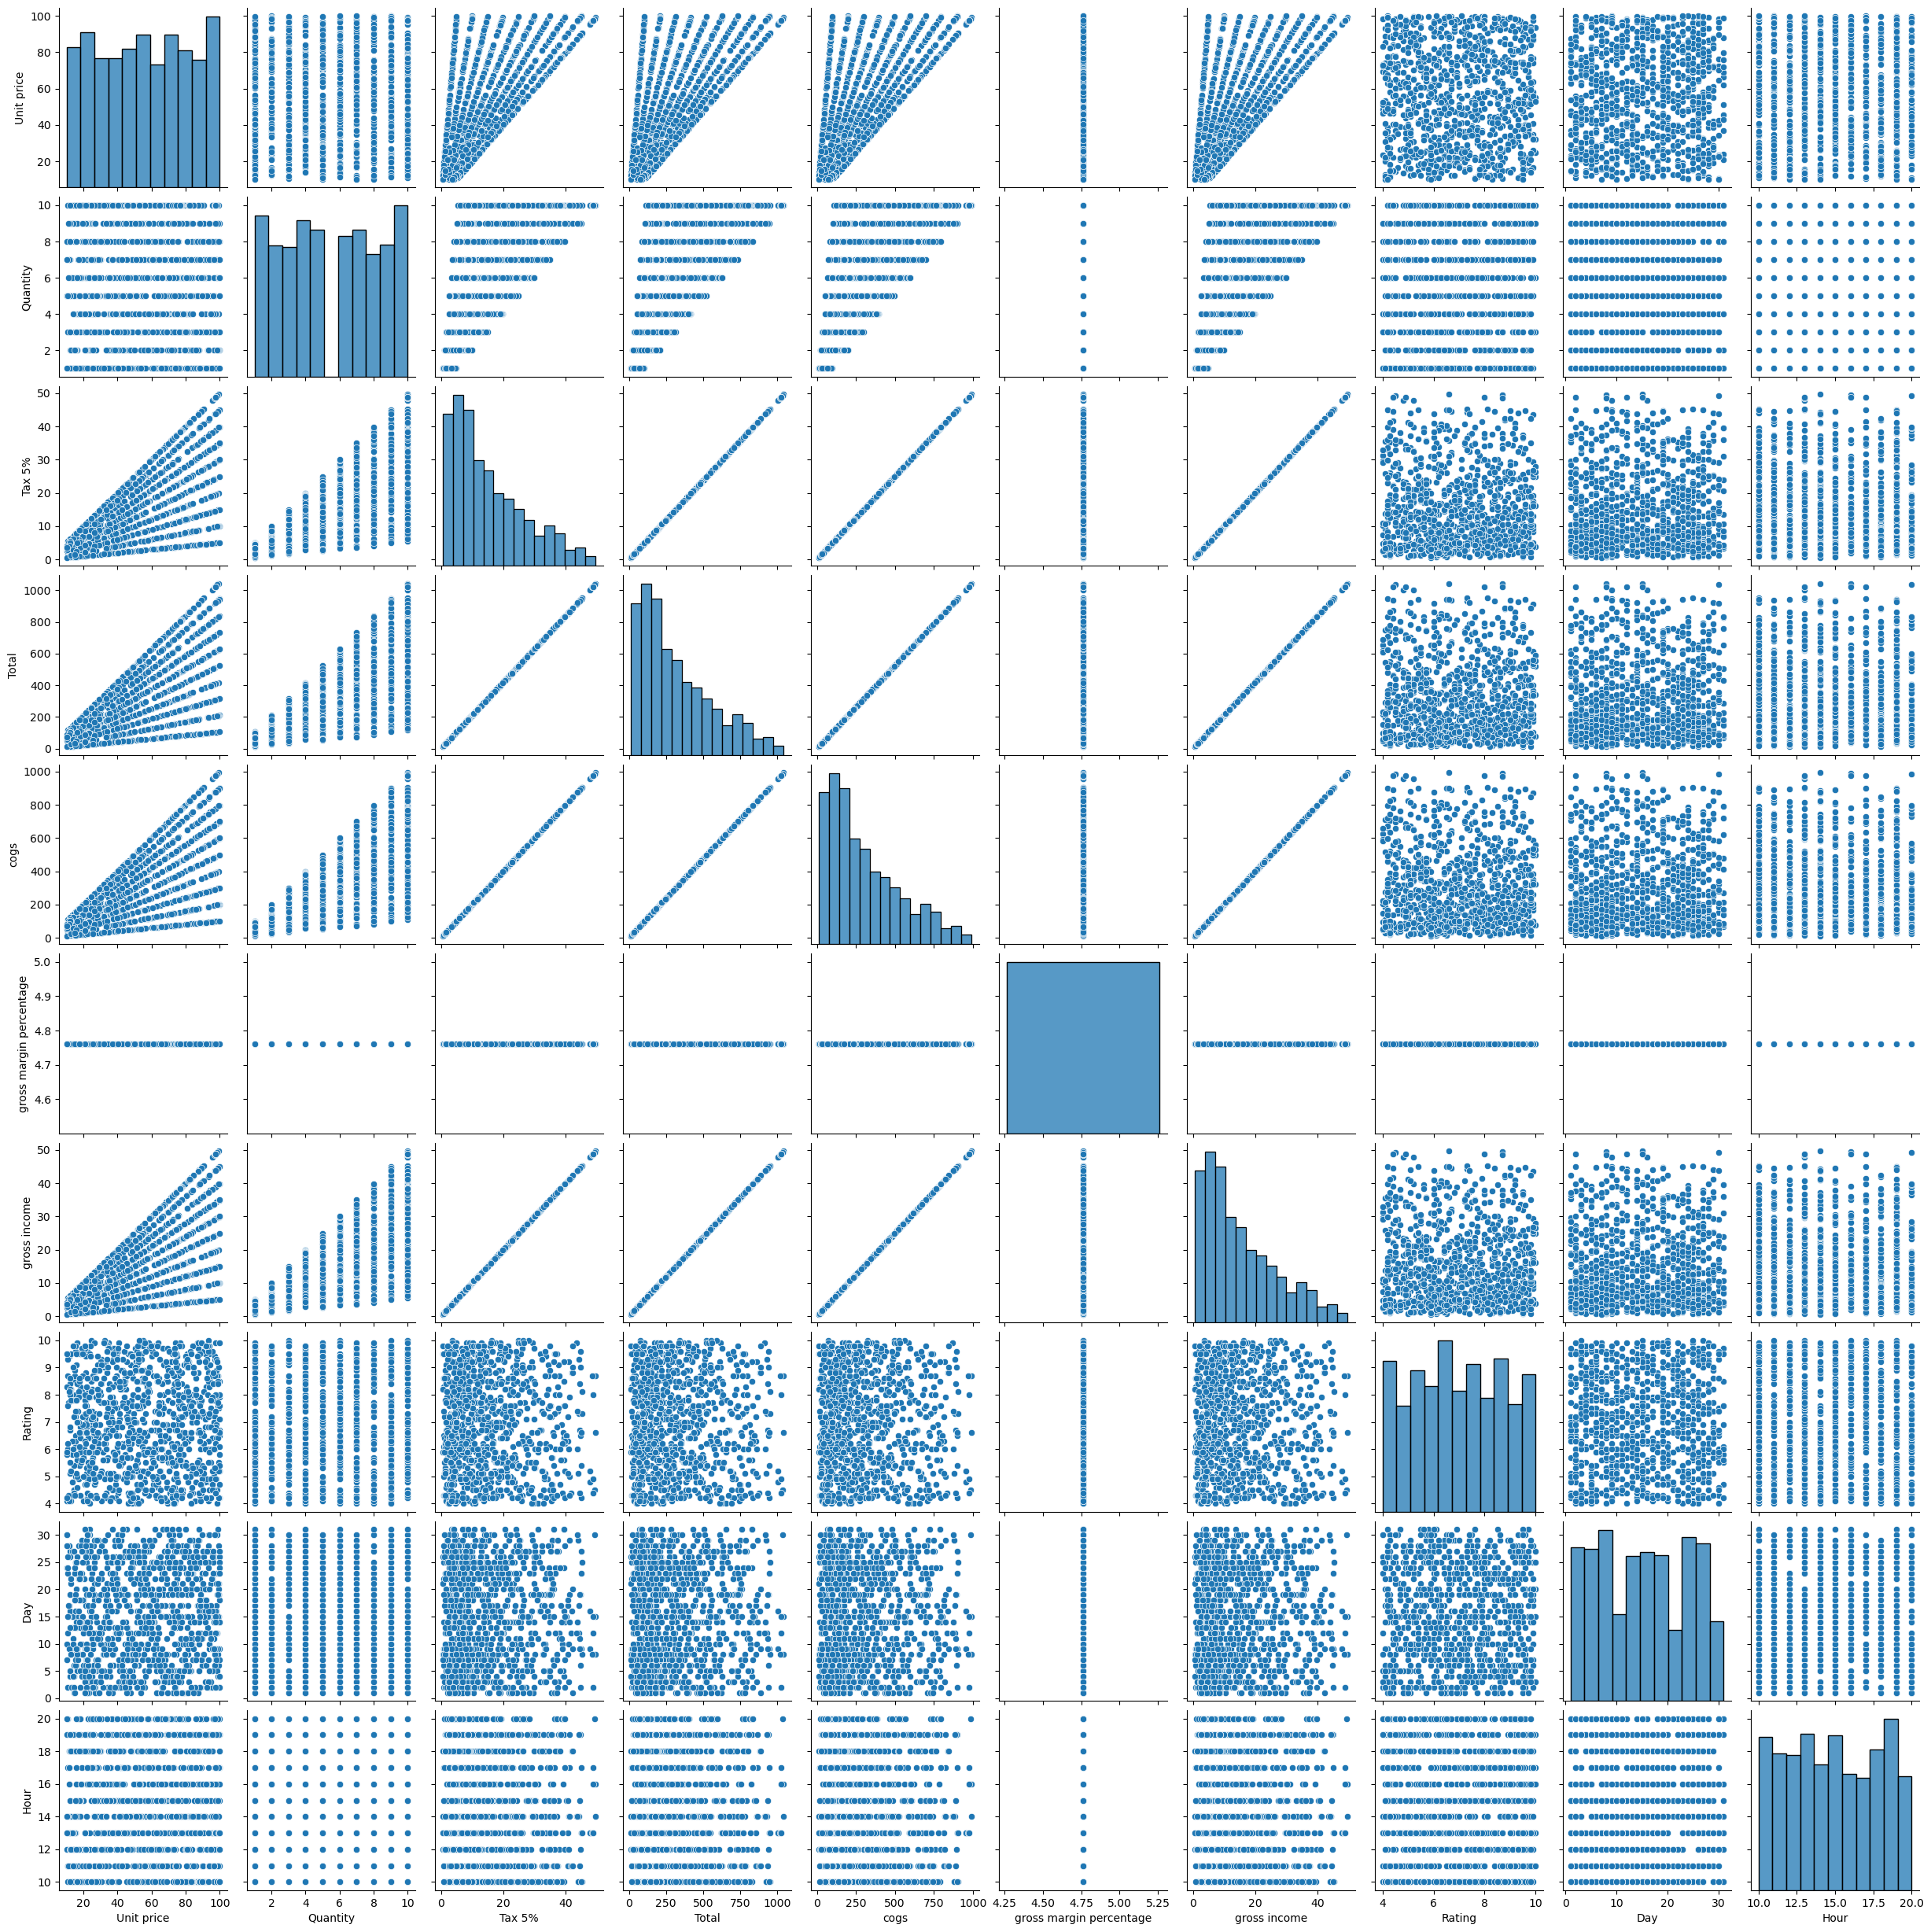

In [78]:
sns.pairplot(sales)

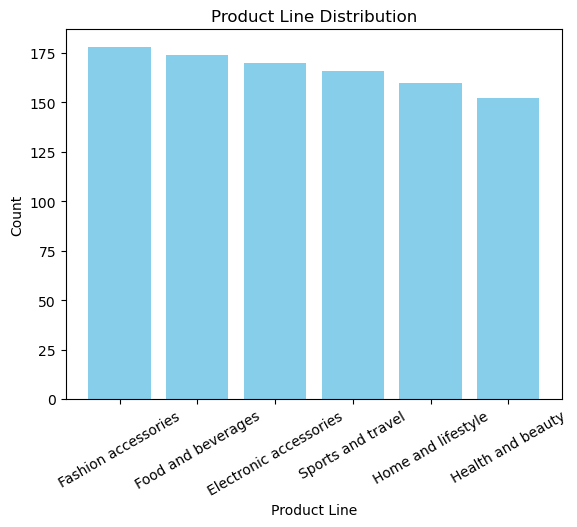

In [87]:
productline = sales['Product line'].value_counts().reset_index()
productline.columns = ['Product line', 'Count']
plt.bar(productline['Product line'], productline['Count'], color='skyblue')
plt.xlabel("Product Line")
plt.ylabel("Count")
plt.title("Product Line Distribution")
plt.xticks(rotation=30)  

plt.show()


##### It shows here that the fashion accessories followed by food and beverages and electornic accessories are the most popular product line in branches

<AxesSubplot:xlabel='Rating', ylabel='Count'>

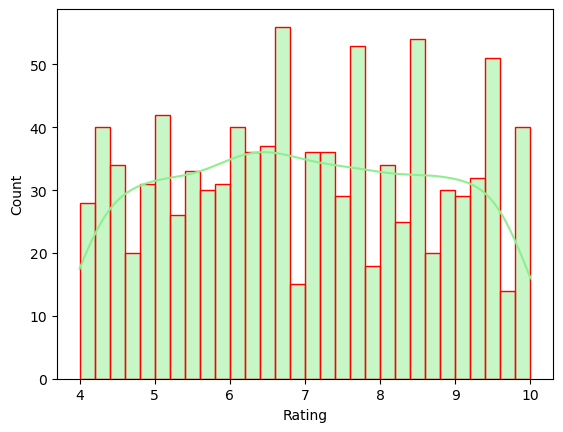

In [198]:
sns.histplot(sales['Rating'], bins=30, kde=True, color='lightgreen', edgecolor='red')

##### Distribution of ratings accross the branch shows that the highest count of rating is approximately 7

Text(0.5, 1.0, 'Ratings by Branch')

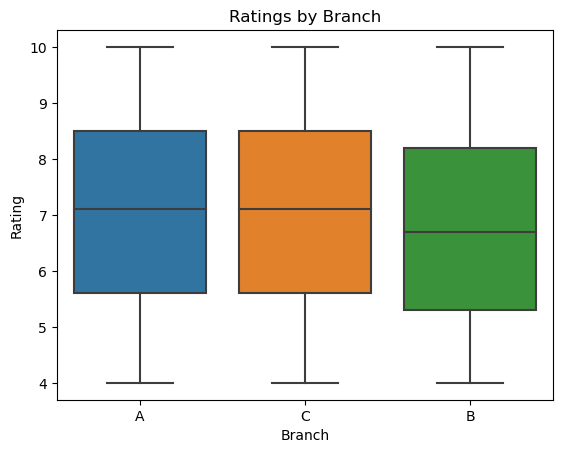

In [93]:
sns.boxplot(x="Branch", y ="Rating" ,data =sales).set_title("Ratings by Branch")

##### Branch B has the lowest rating among all other branches and Branch A and C have equal rating

Text(0.5, 1.0, 'Count of types of customers by Branch')

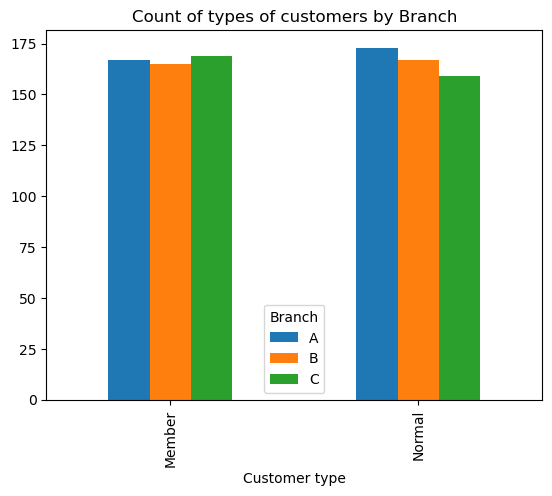

In [151]:
sales.groupby(['Branch','Customer type']).size().unstack(0).plot.bar().set_title("Count of types of customers by Branch")


##### The Member customers buy most of their poroducts from Branch C and least from Branch B whereas Normal customers purchase heavily from Branch A and then B but least from Branch C

<AxesSubplot:xlabel='count', ylabel='Product line'>

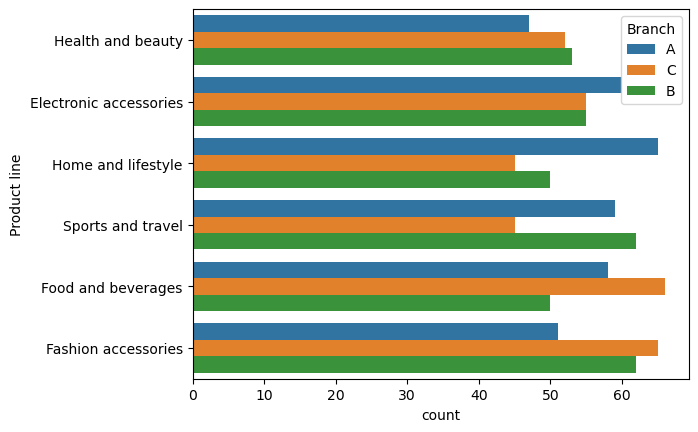

In [96]:
sns.countplot(y='Product line',hue='Branch',data=sales)


##### From the barplot we can observe that in Branch A, Home and lifestyle items are sold the most. In Branch B, Sports and travel and Fashion accessories are mostly sold whereas in Branch C, Food Beverages and Fashion accessories are maximum sold

<AxesSubplot:xlabel='Total', ylabel='Product line'>

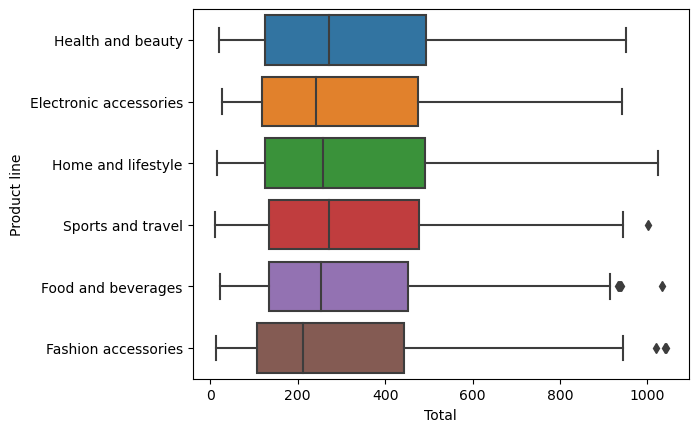

In [122]:
sns.boxplot(y = 'Product line', x = 'Total', data=sales )


##### From the above visual, Health and Beauty,Sports and travel generate more total sales than Electronic accessories, Home and lifestyle, food and beverages and fashion accessories.

Text(0.5, 1.0, 'Ratings by Product Lines')

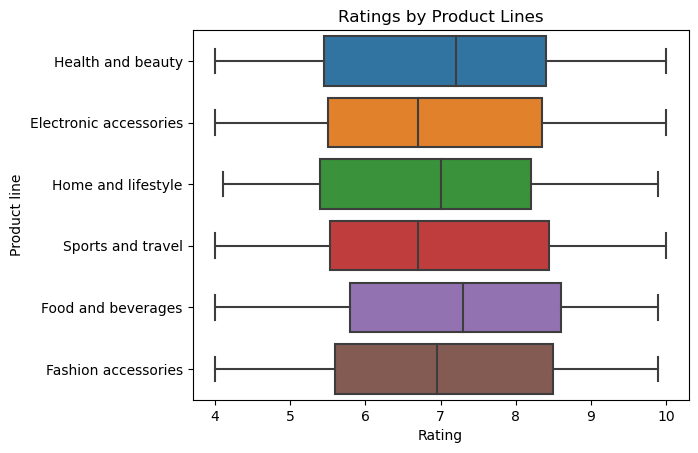

In [152]:
sns.boxplot(y = 'Product line', x = 'Rating', data=sales ).set_title("Ratings by Product Lines")


##### Health and Beauty and food and beverages have higher rating as compared to other products. The least rating was observed for electronic accessories and sport and travel items

Text(0.5, 1.0, 'Most preferred product purchased by gender type')

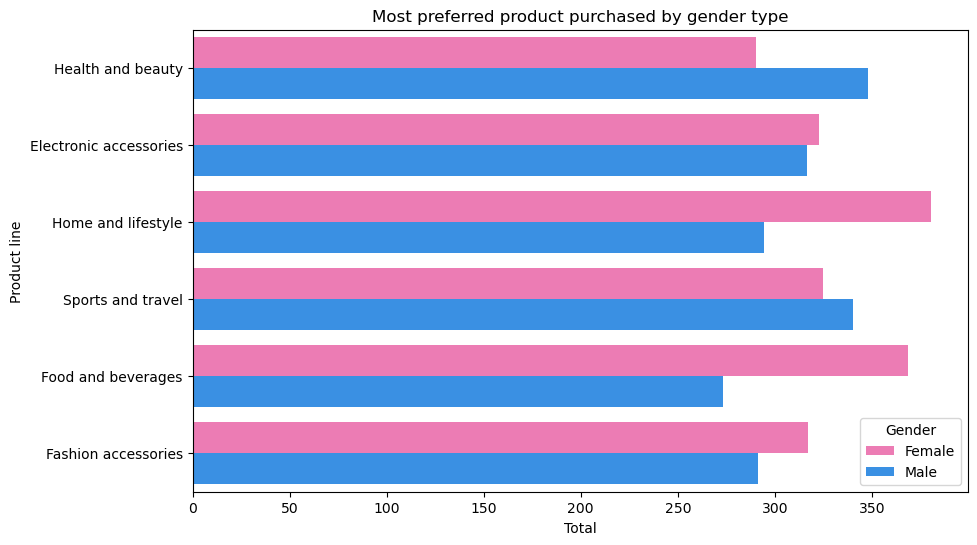

In [171]:
plt.figure(figsize=(10, 6))
custom_colors = {'Female': '#ff69b4', 'Male': '#1e90ff'}
sns.barplot(y='Product line', x='Total', hue='Gender',ci=None,palette=custom_colors,data=sales).set_title("Most preferred product purchased by gender type")

##### Females prefer to shop for Home and lifestyle items and generate the maximum sales of around 380 dollars whereas males are more inclined to shop for Health and beauty products and generated maximum sales of around 350 dollars

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

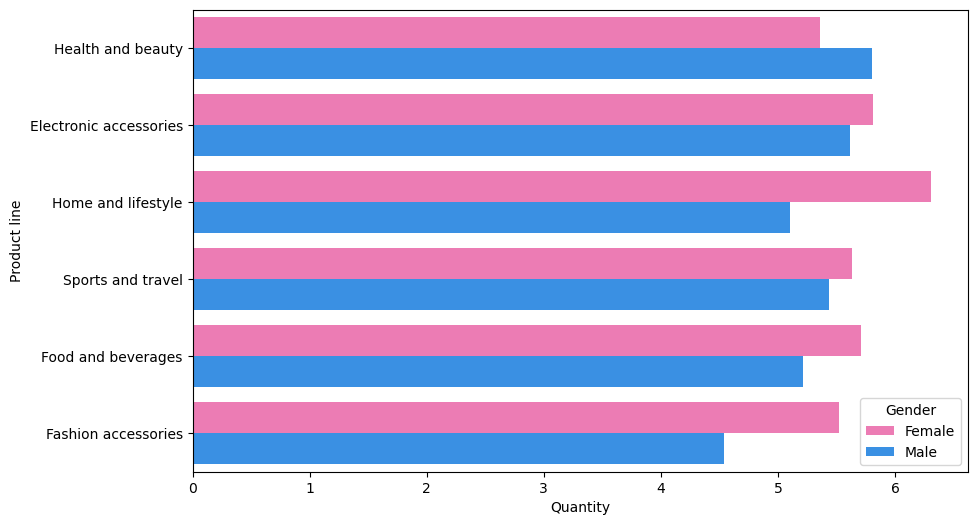

In [172]:
plt.figure(figsize=(10, 6))
custom_colors = {'Female': '#ff69b4', 'Male': '#1e90ff'}
sns.barplot(x='Quantity',hue='Gender',y = 'Product line',ci=None,palette=custom_colors,data=sales)

##### As observed previously in total sales, Females prefer to shop for Home and lifestyle items and that is why they purchase maximum quantity(6.3) of this product whereas males are more inclined to shop for Health and beauty products and they purchased maximum quantity of around 5.7

<AxesSubplot:xlabel='Unit price', ylabel='Product line'>

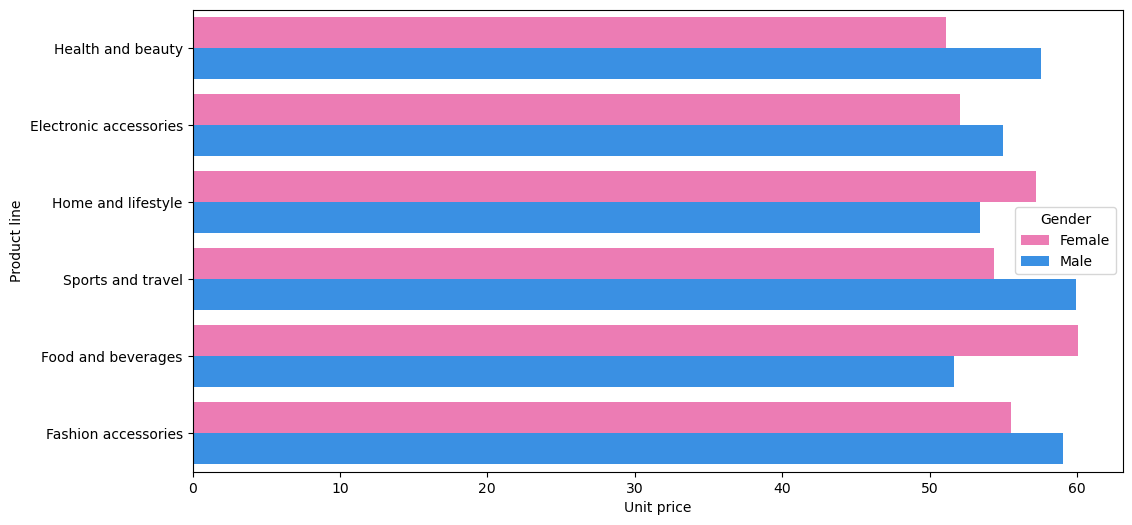

In [173]:
plt.figure(figsize=(12, 6))
custom_colors = {'Female': '#ff69b4', 'Male': '#1e90ff'}
sns.barplot(x='Unit price',hue='Gender',y = 'Product line',palette=custom_colors,ci=None,data=sales)


##### this depicts that males and females don't want to compromise on the quality of sports and travel products as well as food and beverages products, so they are buying these products in maximum even though these products have higher unit price.

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

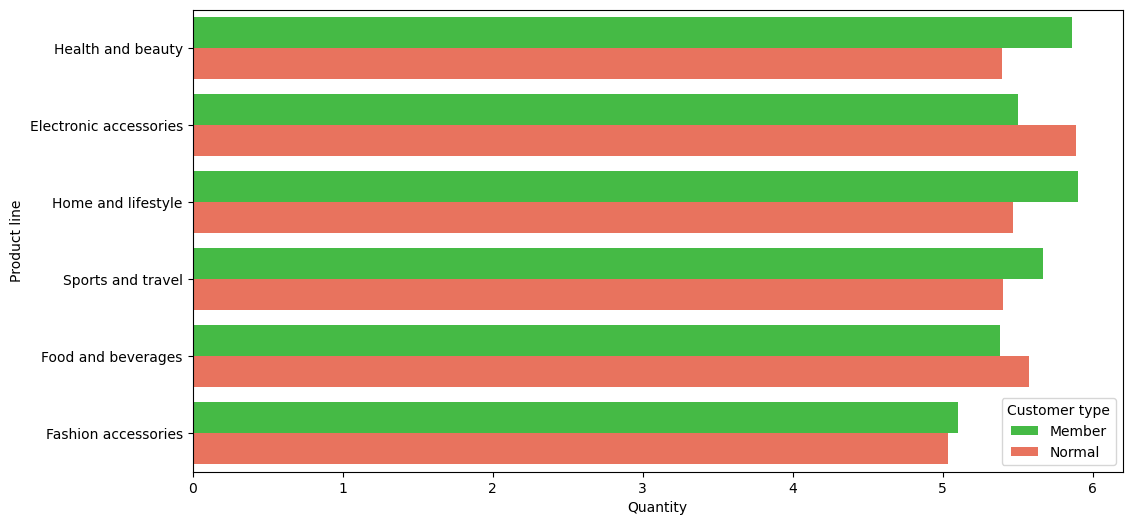

In [174]:
custom_colors = {'Member': '#32CD32', 'Normal': '#FF6347'}
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Product line', hue='Customer type', data=sales, ci=None, palette=custom_colors)



<AxesSubplot:xlabel='Total', ylabel='Product line'>

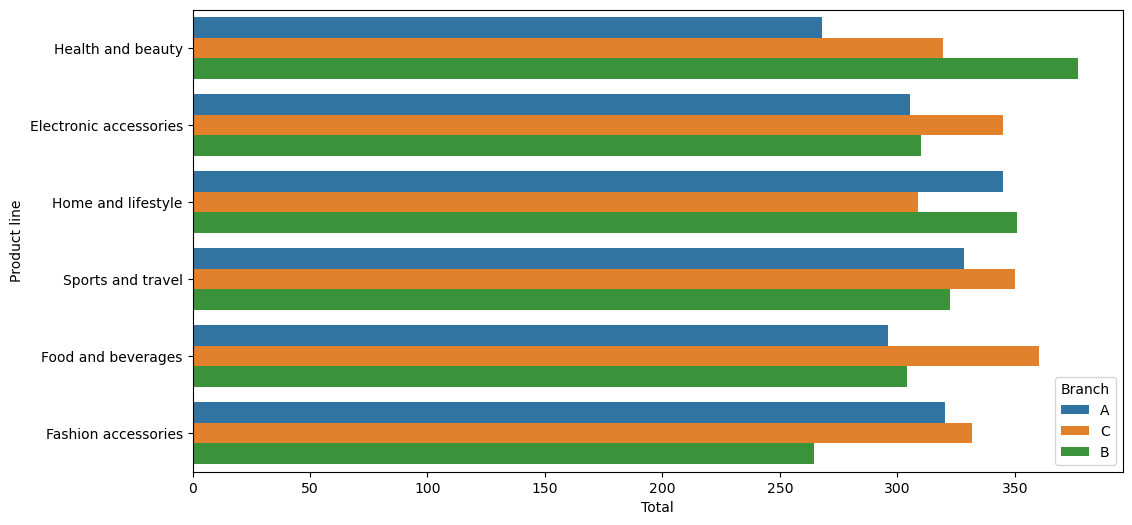

In [177]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total',y = 'Product line',hue='Branch',ci=None,data=sales)

#### In Branch A the maximum sales are generated by home and lifestyle products, in Branch B, Health and beauty products generates the maximum sales and in Branch C food and beverages generated maximum sales

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

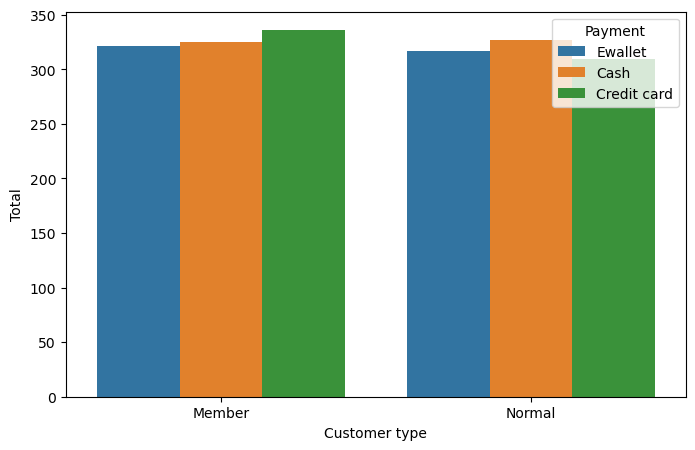

In [183]:
plt.figure(figsize=(8, 5))
sns.barplot(y='Total',hue='Payment',x = 'Customer type',ci=None,data=sales)

##### Members prefer to purchase itmes using credit card and generate maximum sales of about 345 dollars whereas normal customers prefer to shop by cash and generate maximim sales of about 330 dollars

Text(0.5, 1.0, 'Hourly sales')

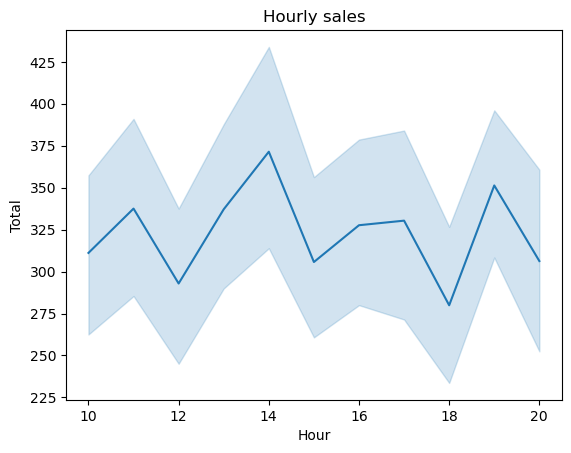

In [185]:
#Hourly sales
sns.lineplot(x="Hour",  y = 'Total',data =sales).set_title("Hourly sales")

Text(0.5, 1.0, 'Daily sales')

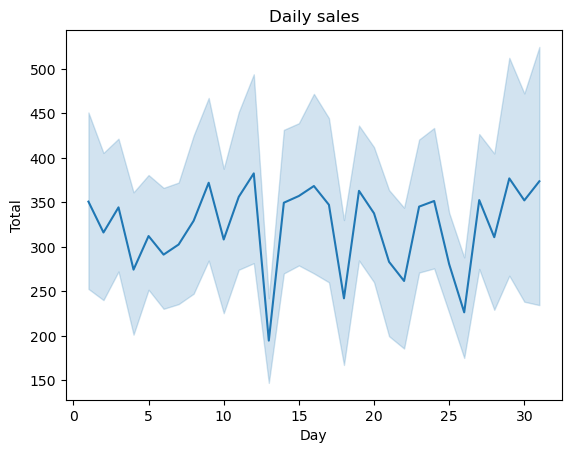

In [192]:
#Daily Sales
sns.lineplot(x="Day",  y = 'Total',data =sales).set_title("Daily sales")

##### Most of the sale sare generates in around 28 days


Text(0.5, 1.0, 'Monthly sales')

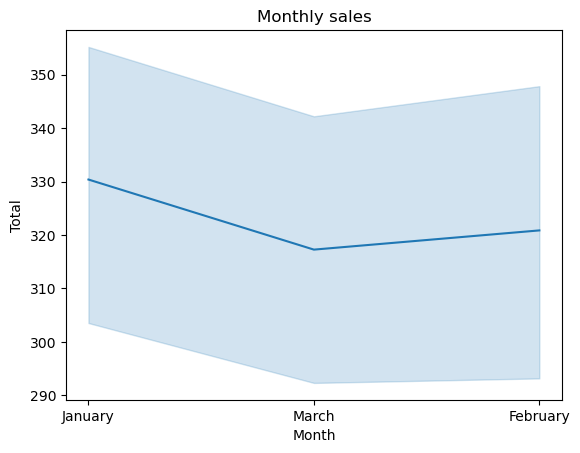

In [193]:
sns.lineplot(x="Month",  y = 'Total',data =sales).set_title("Monthly sales")


## Key Insights

In this EDA, we have shown the differnt types of customer purchasing behavior from payment methods to what type of product are the purchased most. We show the peak sales of hour, day and month in this analysis. This insights can help decision makers on what type of product they must focus on and how they can generate more sales thorugh this pattern

### EDA

We have succesfully shown the process of EDA from Data Visualization to Data wrangling. This process helps us to deliver these data viszuals to project inisghts to viewrs